In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleaned_online_retail.csv', parse_dates=['InvoiceDate'])

sns.set(style='whitegrid', palette='pastel')

/var/folders/rx/qm9kk71x5pdddywns1wg77lr0000gn/T/ipykernel_30723/2500028199.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
/Users/supunmadhuranga/PycharmProjects/Strategic-Growth-Analysis-Team-Code-Serpents/.venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


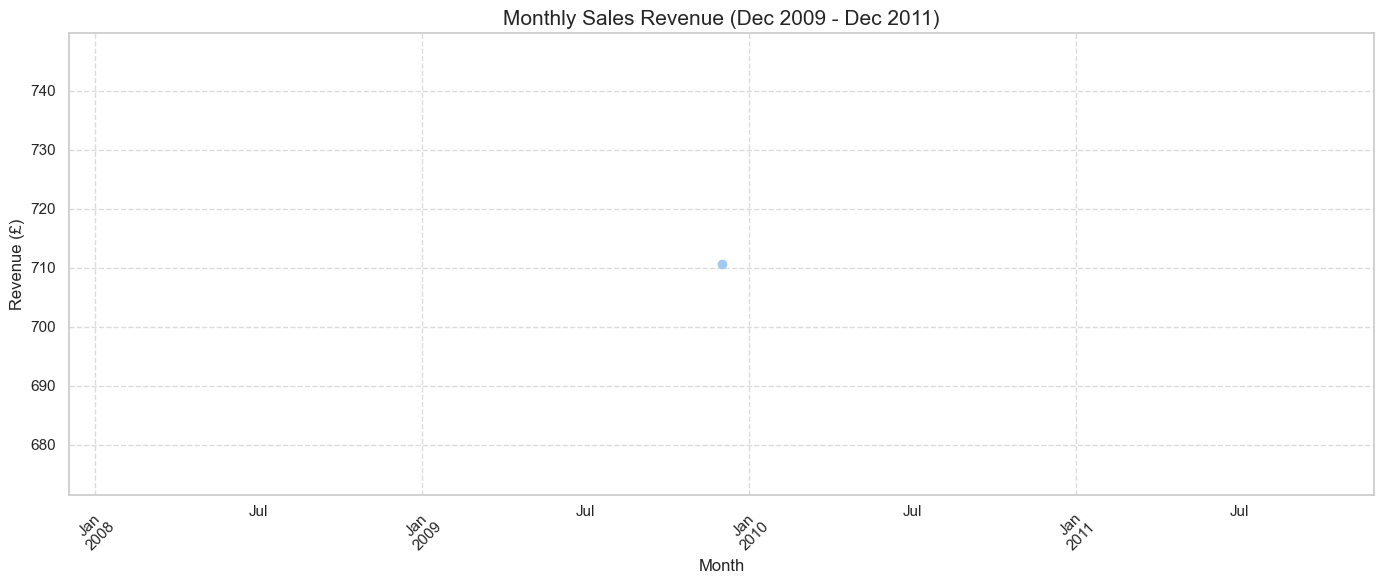

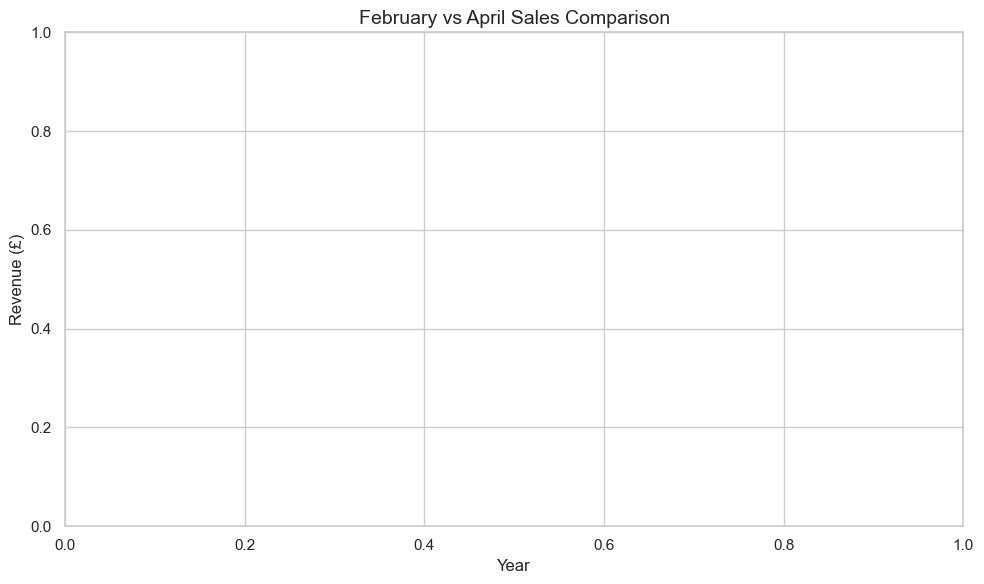

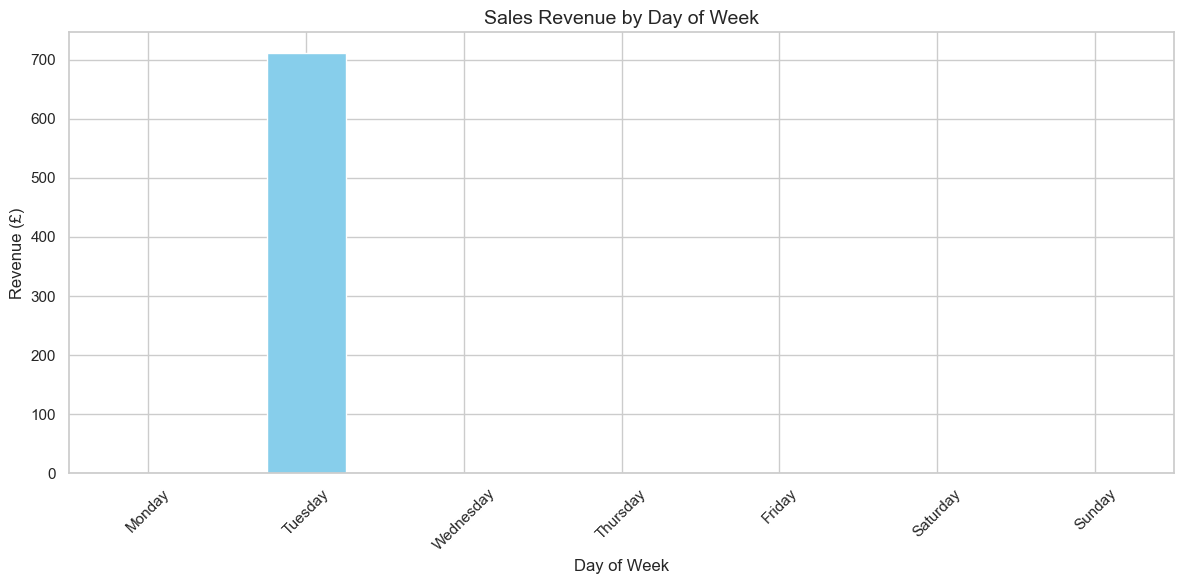

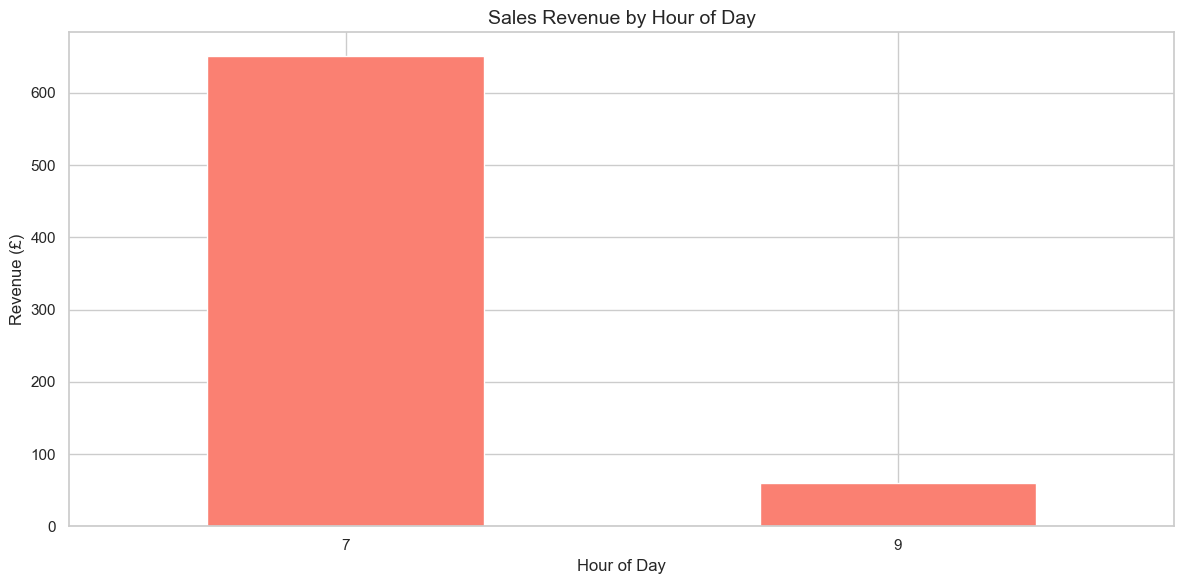

In [2]:
# Monthly Sales Revenue Analysis
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Sales Revenue (Dec 2009 - Dec 2011)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales.png', dpi=300)
plt.show()

# Investigate February and April dips
feb_apr_comparison = monthly_sales[monthly_sales.index.month.isin([2,4])]
feb_apr_comparison = feb_apr_comparison.reset_index()
feb_apr_comparison['Year'] = feb_apr_comparison['InvoiceDate'].dt.year
feb_apr_comparison['Month'] = feb_apr_comparison['InvoiceDate'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='TotalPrice', hue='Month', data=feb_apr_comparison)
plt.title('February vs April Sales Comparison', fontsize=14)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.savefig('feb_apr_comparison.png', dpi=300)
plt.show()

# Daily and Hourly Sales Patterns
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Daily pattern
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Revenue by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_sales.png', dpi=300)
plt.show()

# Hourly pattern
hourly_sales = df.groupby('HourOfDay')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='salmon')
plt.title('Sales Revenue by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('hourly_sales.png', dpi=300)
plt.show()

UK Contribution: 100.00%
International Contribution: 0.00%


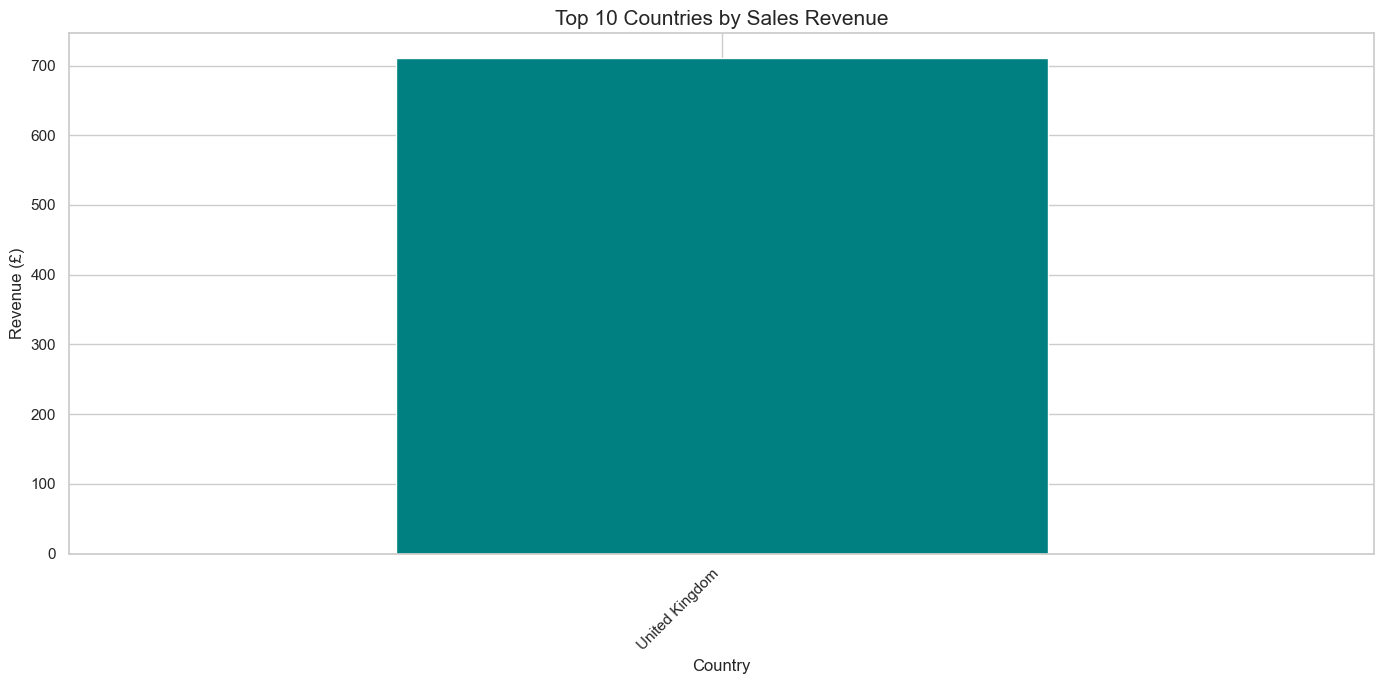

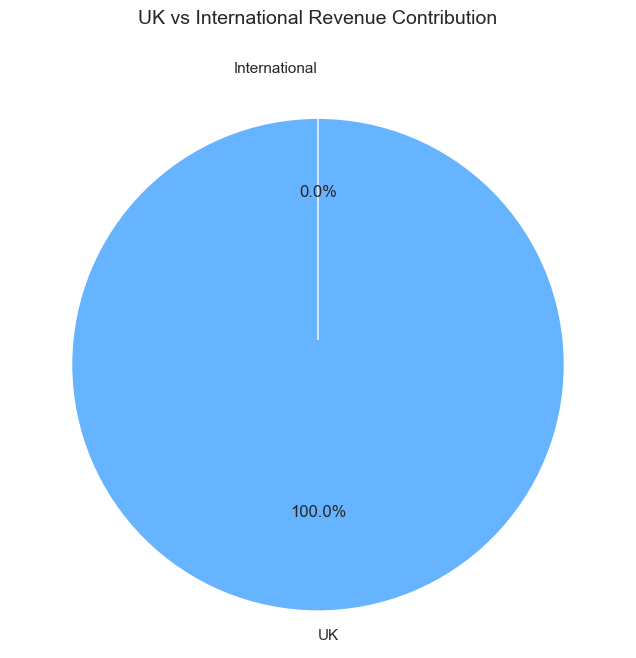

In [4]:
# Country-wise Revenue Analysis
# =============================
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_10_countries = country_revenue.head(10)

# UK vs International revenue
uk_revenue = country_revenue.get('United Kingdom', 0)
international_revenue = country_revenue.sum() - uk_revenue
uk_percentage = (uk_revenue / country_revenue.sum()) * 100

print(f"UK Contribution: {uk_percentage:.2f}%")
print(f"International Contribution: {100 - uk_percentage:.2f}%")

# Visualization
plt.figure(figsize=(14, 7))
top_10_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Sales Revenue', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('country_revenue.png', dpi=300)
plt.show()

# Pie chart for UK vs International
plt.figure(figsize=(8, 8))
plt.pie([uk_percentage, 100 - uk_percentage],
        labels=['UK', 'International'],
        autopct='%1.1f%%',
        colors=['#66b3ff','#99ff99'],
        startangle=90,
        explode=(0.1, 0))
plt.title('UK vs International Revenue Contribution', fontsize=14)
plt.savefig('uk_vs_international.png', dpi=300)
plt.show()

/var/folders/rx/qm9kk71x5pdddywns1wg77lr0000gn/T/ipykernel_30723/1508055428.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalQuantity', y='Description', data=top_10_quantity,
/var/folders/rx/qm9kk71x5pdddywns1wg77lr0000gn/T/ipykernel_30723/1508055428.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalRevenue', y='Description', data=top_10_revenue,


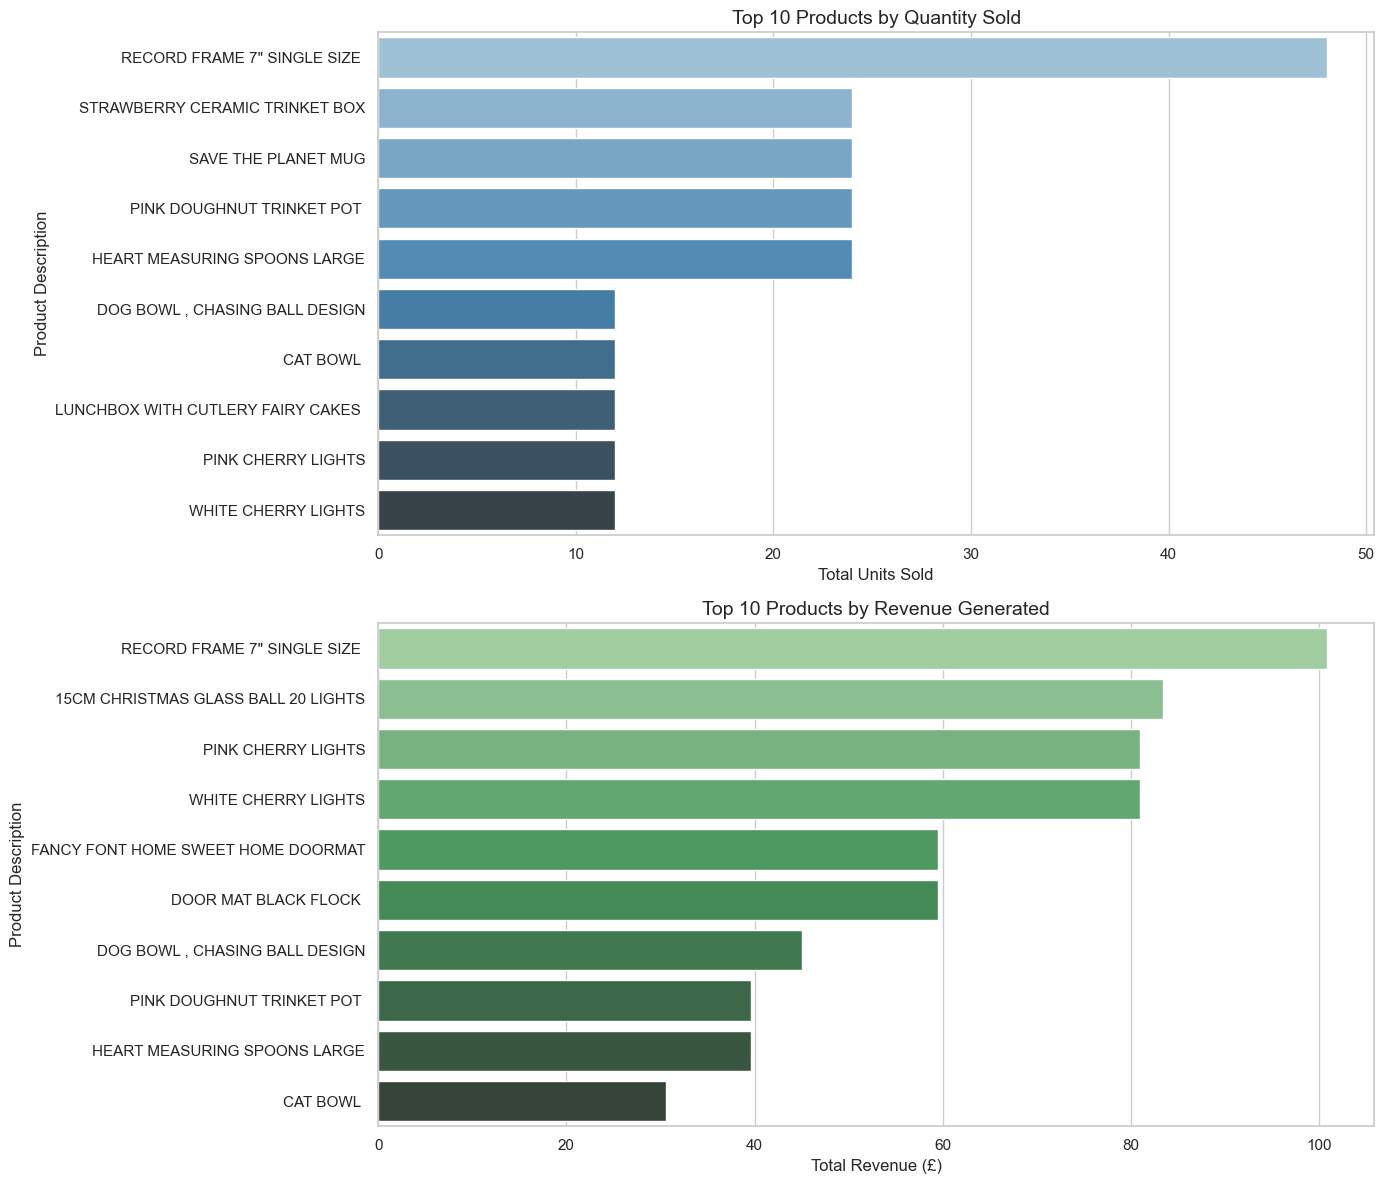


Product Portfolio Comparison:
Products appearing in both top lists: 7
Quantity-only products: 3
Revenue-only products: 3

Comparison Table:


,Description,TotalQuantity,TotalRevenue
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,Not in Top 10,83.4
1,CAT BOWL,12.0,30.6
2,"DOG BOWL , CHASING BALL DESIGN",12.0,45.0
3,DOOR MAT BLACK FLOCK,Not in Top 10,59.5
4,FANCY FONT HOME SWEET HOME DOORMAT,Not in Top 10,59.5
5,HEART MEASURING SPOONS LARGE,24.0,39.6
6,LUNCHBOX WITH CUTLERY FAIRY CAKES,12.0,Not in Top 10
7,PINK CHERRY LIGHTS,12.0,81.0
8,PINK DOUGHNUT TRINKET POT,24.0,39.6
9,"RECORD FRAME 7"" SINGLE SIZE",48.0,100.8


In [5]:
# Product Performance Analysis
# ============================
product_performance = df.groupby(['StockCode', 'Description']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()

# Top 10 by quantity
top_10_quantity = product_performance.sort_values('TotalQuantity', ascending=False).head(10)

# Top 10 by revenue
top_10_revenue = product_performance.sort_values('TotalRevenue', ascending=False).head(10)

# Visualizations
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Quantity plot
sns.barplot(x='TotalQuantity', y='Description', data=top_10_quantity,
            ax=ax[0], palette='Blues_d')
ax[0].set_title('Top 10 Products by Quantity Sold', fontsize=14)
ax[0].set_xlabel('Total Units Sold', fontsize=12)
ax[0].set_ylabel('Product Description', fontsize=12)

# Revenue plot
sns.barplot(x='TotalRevenue', y='Description', data=top_10_revenue,
            ax=ax[1], palette='Greens_d')
ax[1].set_title('Top 10 Products by Revenue Generated', fontsize=14)
ax[1].set_xlabel('Total Revenue (£)', fontsize=12)
ax[1].set_ylabel('Product Description', fontsize=12)

plt.tight_layout()
plt.savefig('product_performance.png', dpi=300)
plt.show()

# Comparison analysis
comparison_df = pd.merge(
    top_10_quantity[['Description']],
    top_10_revenue[['Description']],
    on='Description',
    how='outer',
    indicator=True
)

print("\nProduct Portfolio Comparison:")
print(f"Products appearing in both top lists: {comparison_df[comparison_df['_merge'] == 'both'].shape[0]}")
print(f"Quantity-only products: {comparison_df[comparison_df['_merge'] == 'left_only'].shape[0]}")
print(f"Revenue-only products: {comparison_df[comparison_df['_merge'] == 'right_only'].shape[0]}")

# Create a comparison table
comparison_table = pd.merge(
    top_10_quantity[['Description', 'TotalQuantity']],
    top_10_revenue[['Description', 'TotalRevenue']],
    on='Description',
    how='outer'
).fillna('Not in Top 10')

print("\nComparison Table:")
display(comparison_table)